<h2>About this notebook</h2>

A purpose of this notebook is to show how Python can implement mathematical notions in a very intuitive manner. Thus it is possible to write mathematical tutorials where the definitions can be directly executed as Python code. Presumably such a representation is appreciated by  learners. This tutorial is not complete, but just a proof of concept at the moment. 

Jupyter notebooks contain text cells and code cells.
Code cells can be executed with <b>SHIFT-ENTER</b>. The next cell installs components and settings that are needed for this notebook and should be executed once after the notebook has been opened. The FCA software concepts.py was written by Sebastian Bank.

In [1]:
!pip install concepts
from utils.fcasettings import *


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.9 -m pip install --upgrade pip


<h2>FCA Tutorial</h2>

<h3>Formal Contexts</h3>

Formal Concept Analysis starts with the notion of a <i>formal context</i> that is defined as a triple $(O,A,I)$ where $O$ is a set of <i>formal objects</i>,
$A$ is a set of <i>formal attributes</i> and $I$ (for <i>incidence</i> is a
binary relation between $O$ and $A$ with $oIa$ denoting
"object $o$ has attribute $a$". The software used in this notebook supports different ways of defining formal contexts, but using arrays instead of sets.

In [2]:
objects = ("a", "b", "c")
attributes = ("1", "2", "3")
incidence =  [(True, False, False), 
              (False, True, True), 
              (True, False, False)]
ctx = Context(objects, attributes, incidence)

Functions for retrieving objects, attributes and the incidence relation are available:

In [3]:
ctx.objects
ctx.properties
ctx.bools

('a', 'b', 'c')

('1', '2', '3')

[(True, False, False), (False, True, True), (True, False, False)]

Here is a second example of creating a formal context:

In [4]:
ctx2 = make_context('''
     |male|female|adult|child|
man  |  X |      |  X  |     |
woman|    |   X  |  X  |     |
boy  |  X |      |     |  X  |
girl |    |   X  |     |  X  |
''')  

The following function displays the relation as an array of tuples:

In [5]:
showRelation(ctx)

[('a', '1'), ('b', '2'), ('b', '3'), ('c', '1')]

<h3>Prime Operator</h3>

The <i>prime-operator</i>
yields all common attributes of a set of objects $X \subseteq O$,
$ X':= \{a \in A \mid oIa \mbox{ for all } o \in X \} $
or all common objects of a set of attributes $Y \subseteq M$,
$ Y':= \{o \in O \mid oIa \mbox{ for all } a \in Y \} $.

These notions can be defined in Python in a very similar manner:

In [6]:
def objprime(contxt,setX):
    return {a for a in contxt.properties if all((o,a) in showRelation(contxt) for o in setX)}
def attrprime(contxt,setY):
    return {o for o in contxt.objects if all((o,a) in showRelation(contxt) for a in setY)}

In [7]:
# For example:
objprime(ctx,{'a'})
attrprime(ctx,{'2','3'})
attrprime(ctx,{'1'})
objprime(ctx,{'a','c'})

{'1'}

{'b'}

{'a', 'c'}

{'1'}

<h3>Formal Concepts and Concept Lattices</h3>

A pair $(X,Y)$ with $X \subseteq O, Y \subseteq A$ is said to be a <i>formal concept</i> 
of the context $(O,A,I)$ if $X=Y'$ and $ Y=X'$.

Again this can be directly translated into Python:

In [8]:
def isConcept (contxt,setX,setY):
    return setX == attrprime(contxt,setY) and setY == objprime(contxt,setX)

In [9]:
isConcept(ctx,{'b'},{'2','3'})
isConcept(ctx,{'b'},{'1','3'})

True

False

If $(X,Y)$ is a concept, then $X$ is called the <i>extent</i>, $Y$ is called the
<i>intent</i> of the concept.

The set of all concepts of $(O,A,I)$ is denoted by
${\cal B}(O,A,I)$.

In the Python code below the extents and intents are represented as tuples instead of sets because that is easier for programming. 

In [10]:
setOfAllConcepts(ctx2)

{((), ('male', 'female', 'adult', 'child')),
 (('boy',), ('male', 'child')),
 (('boy', 'girl'), ('child',)),
 (('girl',), ('female', 'child')),
 (('man',), ('male', 'adult')),
 (('man', 'boy'), ('male',)),
 (('man', 'woman'), ('adult',)),
 (('man', 'woman', 'boy', 'girl'), ()),
 (('woman',), ('female', 'adult')),
 (('woman', 'girl'), ('female',))}

The diagram of a lattice can also be produced:

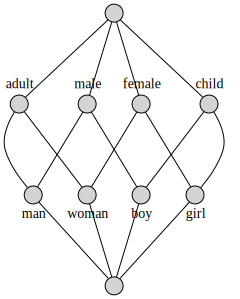

In [11]:
ctx2.lattice.graphviz()